In [28]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import warnings
from imblearn.combine import SMOTETomek
warnings.filterwarnings(action="ignore")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.svm import SVC,SVR
from sklearn.feature_selection import RFE
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier,AdaBoostRegressor,RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier,GradientBoostingRegressor
from xgboost import XGBClassifier,XGBRegressor
from sklearn.model_selection import KFold,GridSearchCV
from sklearn.metrics import f1_score,r2_score
from sklearn.preprocessing import RobustScaler,StandardScaler,MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.cluster import KMeans

In [29]:
#Reading the dataset
data=pd.read_csv(r"E:\Data Science Interview Case Studies\Rapyder\Dataset\DA-AI-ML-interview-assignment-Data.csv")
#glimpse of first 5 rows of the data
data.head()

,Unnamed: 0,title,rating,name,num_ratings,num_reviews,num_followers,synopsis,genre
0,0,Sapiens: A Brief History of Humankind,4.39,Yuval Noah Harari,"8,06,229","46,149",30.5k,"100,000 years ago, at least six human species ...",history
1,1,"Guns, Germs, and Steel: The Fates of Human Soc...",4.04,Jared Diamond,"3,67,056","12,879","6,538","""Diamond has written a book of remarkable scop...",history
2,2,A People's History of the United States,4.07,Howard Zinn,"2,24,620","6,509","2,354","In the book, Zinn presented a different side o...",history
3,3,"The Devil in the White City: Murder, Magic, an...",3.99,Erik Larson,"6,13,157","36,644",64.2k,Author Erik Larson imbues the incredible event...,history
4,4,The Diary of a Young Girl,4.18,Anne Frank,"33,13,033","35,591","4,621",Discovered in the attic in which she spent the...,history


In [30]:
#null value checking
data.isnull().sum()

Unnamed: 0       0
title            0
rating           0
name             0
num_ratings      0
num_reviews      0
num_followers    0
synopsis         0
genre            0
dtype: int64

## Cleaning the data

In [31]:
#dropping the column Unnamed: 0
#since the column is not useful I drop it
data=data.drop("Unnamed: 0",axis=1)
#after dropping the glimpse of first 5 rows of the data just to make sure everything is going fine
data.head()

,title,rating,name,num_ratings,num_reviews,num_followers,synopsis,genre
0,Sapiens: A Brief History of Humankind,4.39,Yuval Noah Harari,"8,06,229","46,149",30.5k,"100,000 years ago, at least six human species ...",history
1,"Guns, Germs, and Steel: The Fates of Human Soc...",4.04,Jared Diamond,"3,67,056","12,879","6,538","""Diamond has written a book of remarkable scop...",history
2,A People's History of the United States,4.07,Howard Zinn,"2,24,620","6,509","2,354","In the book, Zinn presented a different side o...",history
3,"The Devil in the White City: Murder, Magic, an...",3.99,Erik Larson,"6,13,157","36,644",64.2k,Author Erik Larson imbues the incredible event...,history
4,The Diary of a Young Girl,4.18,Anne Frank,"33,13,033","35,591","4,621",Discovered in the attic in which she spent the...,history


In [32]:
#checking the data type of all features in the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1539 entries, 0 to 1538
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          1539 non-null   object 
 1   rating         1539 non-null   float64
 2   name           1539 non-null   object 
 3   num_ratings    1539 non-null   object 
 4   num_reviews    1539 non-null   object 
 5   num_followers  1539 non-null   object 
 6   synopsis       1539 non-null   object 
 7   genre          1539 non-null   object 
dtypes: float64(1), object(7)
memory usage: 96.3+ KB


In [33]:
#num_ratings,num_reviews,num_followers are not in correct data type so i try to fix them
#Handiling the num_ratings column
data["num_ratings"].value_counts()
#Looks like that num_ratings column has comma in between values of that column
#Let's remove comma from this num_ratings column data
data["num_ratings"]=data["num_ratings"].str.replace(",","")
#now let's try to change the datatype of num_ratings column from object to integer 
data["num_ratings"]=pd.to_numeric(data["num_ratings"])

In [34]:
#let's check info of the data for surity
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1539 entries, 0 to 1538
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          1539 non-null   object 
 1   rating         1539 non-null   float64
 2   name           1539 non-null   object 
 3   num_ratings    1539 non-null   int64  
 4   num_reviews    1539 non-null   object 
 5   num_followers  1539 non-null   object 
 6   synopsis       1539 non-null   object 
 7   genre          1539 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 96.3+ KB


In [35]:
#Handiling the num_reviews column
data["num_reviews"].value_counts()
#Looks like that num_reviews column has comma in between values of that column
#Let's remove comma from this num_reviews column data
data["num_reviews"]=data["num_reviews"].str.replace(",","")
#now let's try to change the datatype of num_reviews column from object to integer 
data["num_reviews"]=pd.to_numeric(data["num_reviews"])

In [36]:
#Handiling num_followers column
data["num_followers"].value_counts()
#let's first handle those rows contains followers in it
#let's split all rows using space as a delimiter
#let's apply loop to go through each of the row and take only the first element from a list in each row
#let's replace comma and dot with nothing and "k" with "00"
for rows in range(data.shape[0]):
    data.loc[rows,"num_followers"]=data.loc[rows,"num_followers"].split(" ")[0].replace(",","")
    #replacing k with 00 if "." is present else replace with 000
    if "." in data.loc[rows,"num_followers"]:
        data.loc[rows,"num_followers"]=data.loc[rows,"num_followers"].replace(".","").replace("k","00")
        
    else:
        data.loc[rows,"num_followers"]=data.loc[rows,"num_followers"].replace("k","000")

In [37]:
#Let's change the data type of num_followers column from object to integer
data["num_followers"]=pd.to_numeric(data["num_followers"])

In [38]:
#let's check the info of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1539 entries, 0 to 1538
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          1539 non-null   object 
 1   rating         1539 non-null   float64
 2   name           1539 non-null   object 
 3   num_ratings    1539 non-null   int64  
 4   num_reviews    1539 non-null   int64  
 5   num_followers  1539 non-null   int64  
 6   synopsis       1539 non-null   object 
 7   genre          1539 non-null   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 96.3+ KB


In [39]:
#glimpse of first 5 rows from the data
data.head()

,title,rating,name,num_ratings,num_reviews,num_followers,synopsis,genre
0,Sapiens: A Brief History of Humankind,4.39,Yuval Noah Harari,806229,46149,30500,"100,000 years ago, at least six human species ...",history
1,"Guns, Germs, and Steel: The Fates of Human Soc...",4.04,Jared Diamond,367056,12879,6538,"""Diamond has written a book of remarkable scop...",history
2,A People's History of the United States,4.07,Howard Zinn,224620,6509,2354,"In the book, Zinn presented a different side o...",history
3,"The Devil in the White City: Murder, Magic, an...",3.99,Erik Larson,613157,36644,64200,Author Erik Larson imbues the incredible event...,history
4,The Diary of a Young Girl,4.18,Anne Frank,3313033,35591,4621,Discovered in the attic in which she spent the...,history


In [40]:
#dropping title and synopsis column because they have all unique values and those are not important for the analysis here
data=data.drop(["title","synopsis"],axis=1)

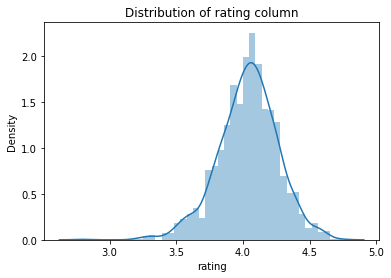

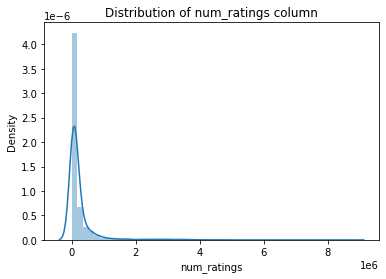

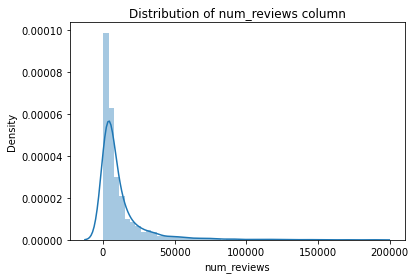

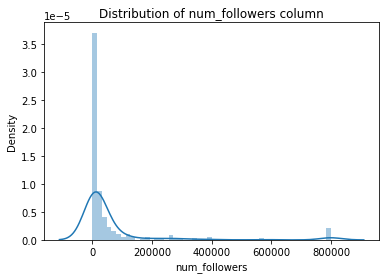

In [41]:
#check distribution of columns in the data
for cols in data.columns:
    if data[cols].dtype!="O":
        plt.title(f"Distribution of {cols} column")
        sns.distplot(data[cols])
        plt.show()

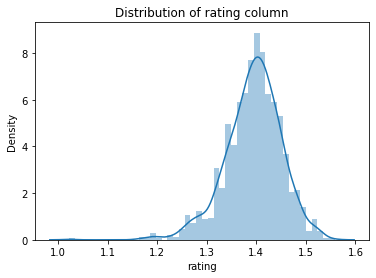

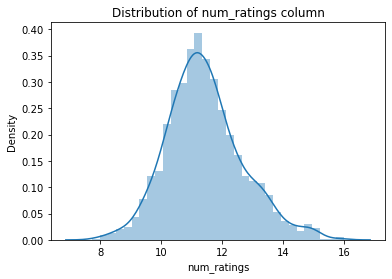

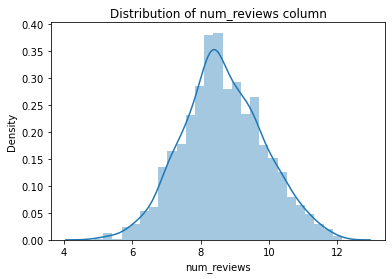

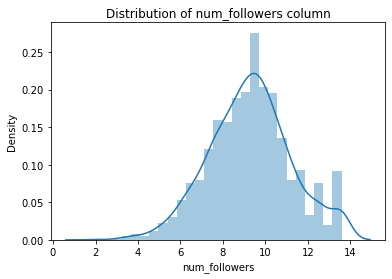

In [42]:
#check distribution of columns in the data
for cols in data.columns:
    if data[cols].dtype!="O":
        plt.title(f"Distribution of {cols} column")
        sns.distplot(np.log(data[cols]))
        plt.show()

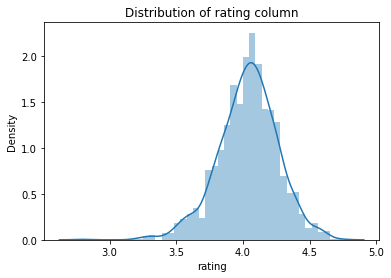

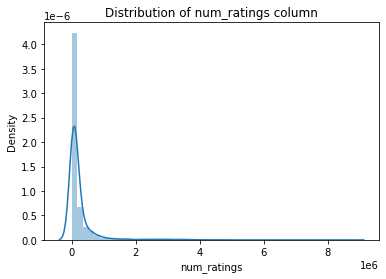

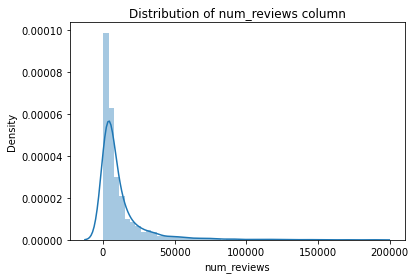

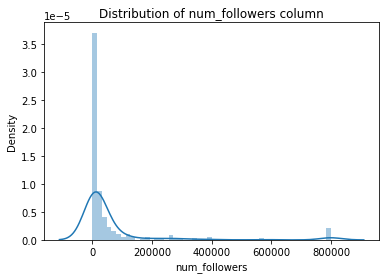

In [43]:
#check distribution of columns in the data
for cols in data.columns:
    if data[cols].dtype!="O":
        plt.title(f"Distribution of {cols} column")
        sns.distplot(data[cols])
        plt.show()

In [44]:
data

,rating,name,num_ratings,num_reviews,num_followers,genre
0,4.39,Yuval Noah Harari,806229,46149,30500,history
1,4.04,Jared Diamond,367056,12879,6538,history
2,4.07,Howard Zinn,224620,6509,2354,history
3,3.99,Erik Larson,613157,36644,64200,history
4,4.18,Anne Frank,3313033,35591,4621,history
...,...,...,...,...,...,...
1534,4.09,Kevin Hearne,83827,7203,11905,fantasy
1535,4.15,Roald Dahl,775001,14252,22897,fantasy
1536,4.25,Pierce Brown,310138,30388,30510,fantasy
1537,4.26,Richelle Mead,337538,12435,66448,fantasy


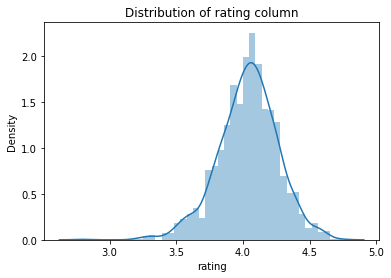

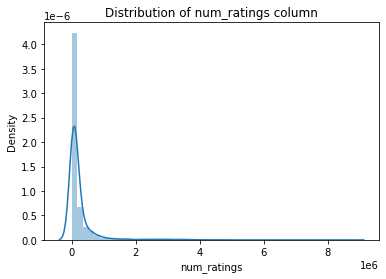

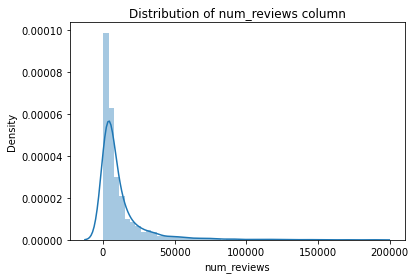

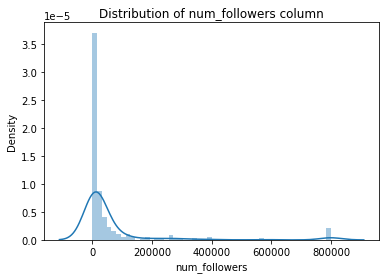

In [45]:
#check distribution of columns in the data
for cols in data.columns:
    if data[cols].dtype!="O":
        plt.title(f"Distribution of {cols} column")
        sns.distplot(data[cols])
        plt.show()

In [46]:
#created a function which will responsible to detect the outlier from the data and remove them
#This function will return the filtered dataframe as well as the previous dataframe shape and current dataframe shape
#Reason behind is that I can easily keep track the amount of data which I am lossing if that is too high then I can't do that
def detect_outlier(data,col_name):
    q1_list=sorted(data[col_name].tolist())
    q3_list=sorted(data[col_name].tolist())
    q1=np.percentile(q1_list,[25])[0]
    q3=np.percentile(q3_list,[75])[0]
    IQR=q3-q1
    upper_bound=q3+1.5*IQR
    lower_bound=q1-1.5*IQR
    new_data=data[(data[col_name]>=lower_bound) & (data[col_name]<=upper_bound)]
    new_data=new_data.reset_index(drop=True)
    return new_data,data.shape,new_data.shape

In [47]:
#Except the num ratings column others are too very skewed distribution
#dataset has columns which contains outliers so it may affect the model but we cannot drop them because this variables are important for our analysis
#so we try to handle the outliers in the data using InterQuartile Range
new_data1,old_shape,new_shape=detect_outlier(data,"rating")
print(old_shape,new_shape)
#O here we can see that we loose very less data here so we can accept this removal

(1539, 6) (1508, 6)


In [21]:
new_data2,old_shape,new_shape=detect_outlier(new_data1,"num_ratings")
print(old_shape,new_shape)
new_data2=new_data2.reset_index(drop=True)
#Here we can see we are lossing almost 196 rows which will not be good as per me so I will not accept this removal
#I will use new_data1 named dataframe for the next column's outlier detection

(1508, 6) (1312, 6)


In [22]:
new_data3,old_shape,new_shape=detect_outlier(new_data1,"num_reviews")
print(old_shape,new_shape)
#Here we can see we are lossing almost 153 rows which will not be good as per me so I will not accept this removal
#I will use new_data1 named dataframe for the next column's outlier detection

(1508, 6) (1355, 6)


In [23]:
new_data4,old_shape,new_shape=detect_outlier(new_data1,"num_followers")
print(old_shape,new_shape)
new_data4=new_data4.reset_index(drop=True)
#Here we can see we are lossing almost 200 rows which will not be good as per me so I will not accept this removal

(1508, 6) (1304, 6)


In [24]:
#the final data for further analysis
new_data1.head()

,rating,name,num_ratings,num_reviews,num_followers,genre
0,4.39,Yuval Noah Harari,806229,46149,30500,history
1,4.04,Jared Diamond,367056,12879,6538,history
2,4.07,Howard Zinn,224620,6509,2354,history
3,3.99,Erik Larson,613157,36644,64200,history
4,4.18,Anne Frank,3313033,35591,4621,history


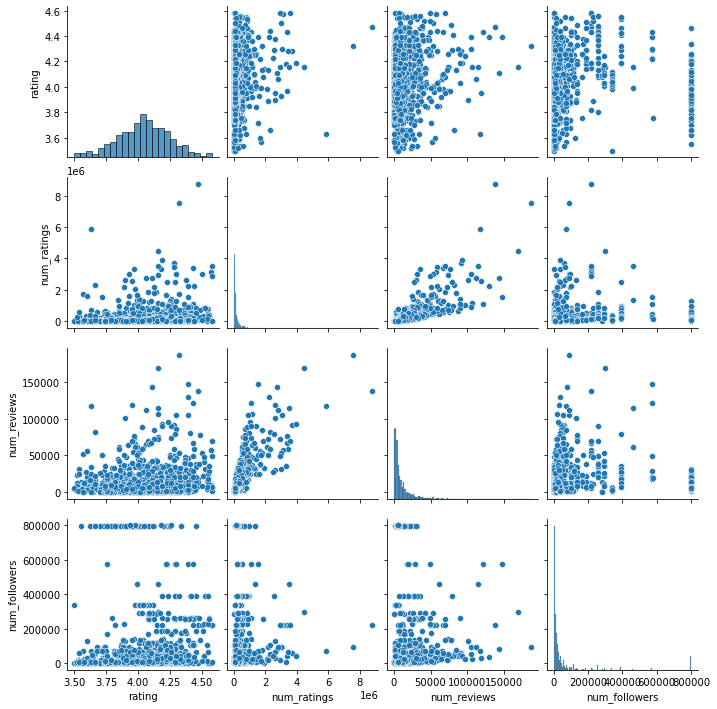

In [25]:
#Let's see the relationship among variables
sns.pairplot(new_data1)

<AxesSubplot:>

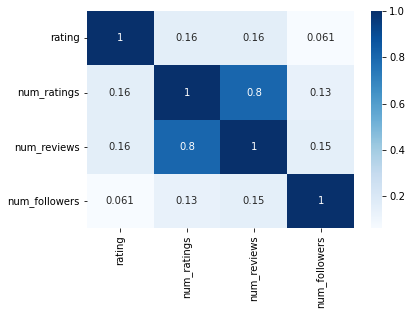

In [26]:
#from the above plots I feel num_reviews and num_ratings may have any correlation
#so let's see the heatmap by which we can understand the correlation between them
sns.heatmap(new_data1.corr(),annot=True,cmap="Blues")

In [27]:
#from the above analysis we can see that almost 0.80 correlation between num_reviews and num ratings and this may cause multicolinearity issue
#so I should drop one of them because one variable can be explained by other one here
# new_data1.drop(["num_reviews"],axis=1,inplace=True)
#After dropping this feature I have seen logistic regression and svc both are not performing well so I am going to keep it
#Since mostly We focus on tree based algorithm multicollinearity does not make any affect in the analysis

In [28]:
#let's see the data
new_data1.head()

,rating,name,num_ratings,num_reviews,num_followers,genre
0,4.39,Yuval Noah Harari,806229,46149,30500,history
1,4.04,Jared Diamond,367056,12879,6538,history
2,4.07,Howard Zinn,224620,6509,2354,history
3,3.99,Erik Larson,613157,36644,64200,history
4,4.18,Anne Frank,3313033,35591,4621,history


In [29]:
#let's see the occurences of authors
new_data1["name"].value_counts()

Stephen King       53
Terry Pratchett    28
Karin Slaughter    16
David Baldacci     16
Lee Child          15
                   ..
Susan Cain          1
Daniel Kahneman     1
Peter Benchley      1
Robert Kirkman      1
Grace Draven        1
Name: name, Length: 827, dtype: int64

In [30]:
#let's see handle categorcal columns here
#Now name column has so many authors so I can keep top 5 most Occured authors and else convert to others
most_frequent_author=list(new_data1["name"].value_counts()[:3].index)
for row in range(new_data1.shape[0]):
    if new_data1.loc[row,"name"] not in most_frequent_author:
        new_data1.loc[row,"name"]="Others"

In [31]:
#let's apply One Hot Encoding on categorical column name
#Concatenate with One Hot Encoded output and the dataframe
final_data=pd.concat([new_data1,pd.get_dummies(new_data1["name"],drop_first=True)],axis=1)
#dropping name column since now it has no use in the data
final_data=final_data.drop(["name"],axis=1)

In [32]:
final_data.head()

,rating,num_ratings,num_reviews,num_followers,genre,Others,Stephen King,Terry Pratchett
0,4.39,806229,46149,30500,history,1,0,0
1,4.04,367056,12879,6538,history,1,0,0
2,4.07,224620,6509,2354,history,1,0,0
3,3.99,613157,36644,64200,history,1,0,0
4,4.18,3313033,35591,4621,history,1,0,0


### TASK - 1

In [33]:
#Let's solve the first task problem where I have to build a model which will predict the genre
#let's the value counts of genre
final_data["genre"].value_counts()

thriller           466
fantasy            341
romance            108
history             99
psychology          99
travel              97
horror              95
science             79
sports              79
science_fiction     45
Name: genre, dtype: int64

In [34]:
#let's divide the x and y
X=final_data.drop("genre",axis=1)
Y=final_data["genre"]

In [35]:
#it seems dataset is imbalanced so let's handle this one atfirst
# Implementing Oversampling for Handling Imbalanced 
smk = SMOTETomek(random_state=42)
X,Y=smk.fit_resample(X,Y)

In [36]:
#let's label the target column
#let's define a dictionary for labeling
mapped_target={Y.unique()[i]:i for i in range(len(Y.unique()))}

In [37]:
#now let's label using mapped_target dictionary
Y=Y.map(mapped_target)

In [38]:
#let's do train test split and start builing the model
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=3)

In [39]:
#resetting index of x_train
X_train=X_train.reset_index(drop=True)

In [40]:
#resetting index in X_test
X_test=X_test.reset_index(drop=True)

In [41]:
#let's apply scaling robust scaler to scale the data since data has outliers so it will work well here
scaler=RobustScaler()
#apply fit transform in the train data
X_train=scaler.fit_transform(X_train)
#apply transform in the test data
X_test=scaler.transform(X_test)

In [42]:
#let's try Logistics Regression model
lg=LogisticRegression(multi_class="multinomial")
kf=KFold()
#apply hyperparameter tuning using kfold cross validation
params={"penalty":['l1', 'l2', 'elasticnet'],"tol":[1e-1,1e-2,1e-3,1e-4],"solver":['lbfgs','liblinear','newton-cg','newton-cholesky','sag','saga']}
#applying grid search cv to get the best parameter
tune=GridSearchCV(estimator=lg,param_grid=params,cv=kf)
#fitting the in GridsearchCv
#getting the best parameter
best_params_logistics=tune.fit(X_train,y_train).best_params_

In [43]:
#let's apply the best params for training the model
# lg=LogisticRegression(penalty=best_params_logistics["penalty"],solver=best_params_logistics["solver"],tol=best_params_logistics["tol"],multi_class="auto")
lg=LogisticRegression()
#fitting the model
lg.fit(X_train,y_train)
#predict the train data
train_prediction=lg.predict(X_train)
#predict test data
test_prediction=lg.predict(X_test)
#calculating f1 score to check the model accuracy
print("Train Accuracy-->",f1_score(y_train,train_prediction,average="weighted"))
print("Test Accuracy-->",f1_score(y_test,test_prediction,average="weighted"))

Train Accuracy--> 0.3954733543736838
Test Accuracy--> 0.3868818756611574


In [44]:
#let's try GaussianNB model
gn=GaussianNB(var_smoothing=1e-3)
#fitting the model
gn.fit(X_train,y_train)
#predict the train data
train_prediction=gn.predict(X_train)
#predict test data
test_prediction=gn.predict(X_test)
#calculating f1 score to check the model accuracy
print("Train Accuracy-->",f1_score(y_train,train_prediction,average="weighted"))
print("Test Accuracy-->",f1_score(y_test,test_prediction,average="weighted"))

Train Accuracy--> 0.2243857515897748
Test Accuracy--> 0.2117891613147633


In [ ]:
#let's try SVC model
svc=SVC(random_state=42)
kf=KFold()
#apply hyperparameter tuning using kfold cross validation
params={"kernel":['linear', 'poly', 'rbf', 'sigmoid'],"degree":[1,2,3],"gamma":['scale', 'auto'],"tol":[1e-1,1e-2,1e-3]}
#applying grid search cv to get the best parameter
tune=GridSearchCV(estimator=svc,param_grid=params,cv=kf)
#getting the best parameter
best_params_svc=tune.fit(X_train,y_train).best_params_

In [ ]:
#let's apply the best params for training the model
svc=SVC(kernel=best_params_svc["kernel"],degree=best_params_svc["degree"],gamma=best_params_svc["gamma"],tol=best_params_svc["tol"],random_state=42)
#fitting the model
svc.fit(X_train,y_train)
#predict the train data
train_prediction=svc.predict(X_train)
#predict test data
test_prediction=svc.predict(X_test)
#calculating f1 score to check the model accuracy
print("Train Accuracy-->",f1_score(train_prediction,y_train,average="weighted"))
print("Test Accuracy-->",f1_score(test_prediction,y_test,average="weighted"))

In [45]:
#let's try Decision Tree model
dt=DecisionTreeClassifier(random_state=42)
kf=KFold()
#apply hyperparameter tuning using kfold cross validation
params={"criterion":['gini', 'entropy', 'log_loss'],"splitter":['best', 'random'],"max_depth":range(2,32)}
#applying grid search cv to get the best parameter
tune=GridSearchCV(estimator=dt,param_grid=params,cv=kf)
#fitting the in GridsearchCv
#getting the best parameter
best_params_decisiontree=tune.fit(X_train,y_train).best_params_

In [46]:
## I tried to use grid search cv but I am not getting the result properly so I tried to put manually values to check the overfitting
dt=DecisionTreeClassifier(max_depth=11,min_samples_split=5,max_features=6,random_state=5)
#fitting the model
dt.fit(X_train,y_train)
#predict the train data
train_prediction=dt.predict(X_train)
#predict test data
test_prediction=dt.predict(X_test)
#calculating f1 score to check the model accuracy
print("Train Accuracy-->",f1_score(y_train,train_prediction,average="weighted"))
print("Test Accuracy-->",f1_score(y_test,test_prediction,average="weighted"))

Train Accuracy--> 0.786612715456139
Test Accuracy--> 0.7061504467203202


In [47]:
#let's try Random Forest model
rf=RandomForestClassifier(n_estimators=64,random_state=42)
kf=KFold()
#apply hyperparameter tuning using kfold cross validation
params={"criterion":['gini', 'entropy', 'log_loss'],"max_depth":range(2,32)}
#applying grid search cv to get the best parameter
tune=GridSearchCV(estimator=rf,param_grid=params,cv=kf)
#fitting the in GridsearchCv
#getting the best parameter
best_params_randomforest=tune.fit(X_train,y_train).best_params_

In [48]:
## I tried to use grid search cv but I am not getting the result properly so I tried to put manually values to check the overfitting
rf=RandomForestClassifier(n_estimators=68,max_depth=15,min_samples_split=4,max_features=6,random_state=5)
#fitting the model
rf.fit(X_train,y_train)
#predict the train data
train_prediction=rf.predict(X_train)
#predict test data
test_prediction=rf.predict(X_test)
#calculating f1 score to check the model accuracy
print("Train Accuracy-->",round(f1_score(y_train,train_prediction,average="weighted"),3))
print("Test Accuracy-->",round(f1_score(y_test,test_prediction,average="weighted"),3))

Train Accuracy--> 0.99
Test Accuracy--> 0.819


In [49]:
#let's try Adaboost model
adc=AdaBoostClassifier(DecisionTreeClassifier(max_depth=11,min_samples_split=5,max_features=6,random_state=5),random_state=5)
kf=KFold()
#apply hyperparameter tuning using kfold cross validation
params={"n_estimators":[32,64,128,256],"learning_rate":[0.1,0.001,0.0001,0.00001,0.05,0.005,0.0005]}
#applying grid search cv to get the best parameter
tune=GridSearchCV(estimator=adc,param_grid=params,cv=kf)
#fitting the in GridsearchCv
#getting the best parameter
best_params_adaboost=tune.fit(X_train,y_train).best_params_

In [50]:
#let's apply the adaboost classifier model
adc=AdaBoostClassifier(DecisionTreeClassifier(max_depth=11,min_samples_split=5,max_features=6,random_state=5),learning_rate=best_params_adaboost["learning_rate"],n_estimators=best_params_adaboost["n_estimators"],random_state=5)
#fitting the model
adc.fit(X_train,y_train)
#predict the train data
train_prediction=adc.predict(X_train)
#predict test data
test_prediction=adc.predict(X_test)
#calculating f1 score to check the model accuracy
print("Train Accuracy-->",f1_score(y_train,train_prediction,average="weighted"))
print("Test Accuracy-->",f1_score(y_test,test_prediction,average="weighted"))
#I tried to put manually this parameters but it was not working well so I put those tuned values here

Train Accuracy--> 1.0
Test Accuracy--> 0.8532773378932076


In [ ]:
#let's try Gradient Boost model
gbc=GradientBoostingClassifier(random_state=5)
kf=KFold()
#apply hyperparameter tuning using kfold cross validation
params={"n_estimators":[32,64,128,256],"learning_rate":[0.1,0.001,0.0001,0.00001,0.05,0.005,0.0005],"max_depth":range(2,32)}
#applying grid search cv to get the best parameter
tune=GridSearchCV(estimator=gbc,param_grid=params,cv=kf)
#fitting the in GridsearchCv
#getting the best parameter
best_params_gradientboost=tune.fit(X_train,y_train).best_params_

In [ ]:
#let's apply the gradient boosting classifier model
gbc=GradientBoostingClassifier(learning_rate=best_params_gradientboost["learning_rate"],n_estimators=best_params_gradientboost["n_estimators"],max_depth=best_params_gradientboost["max_depth"],random_state=5)
#fitting the model
gbc.fit(X_train,y_train)
#predict the train data
train_prediction=gbc.predict(X_train)
#predict test data
test_prediction=gbc.predict(X_test)
#calculating f1 score to check the model accuracy
print("Train Accuracy-->",f1_score(y_train,train_prediction,average="weighted"))
print("Test Accuracy-->",f1_score(y_test,test_prediction,average="weighted"))
#I tried to put manually this parameters but it was not working well so I put those tuned values here

In [53]:
#let's apply the XGBoost classifier model
XG=XGBClassifier(gamma=1)
#fitting the model
XG.fit(X_train,y_train)
#predict the train data
train_prediction=XG.predict(X_train)
#predict test data
test_prediction=XG.predict(X_test)
#calculating f1 score to check the model accuracy
print("Train Accuracy-->",f1_score(y_train,train_prediction,average="weighted"))
print("Test Accuracy-->",f1_score(y_test,test_prediction,average="weighted"))

Train Accuracy--> 0.9390196046914421
Test Accuracy--> 0.7568541066250931


In [54]:
## After tuning all the models most of them just overfitted I tried to change parameters and differnet ways to reduce the overfitting
## So At last I selected decsion tree as my final model
#Here 78% training and 70% testing accuracy I achieved
genres=pd.Series(dt.predict(X_test))
genres

0      2
1      7
2      5
3      1
4      5
      ..
806    8
807    3
808    5
809    4
810    5
Length: 811, dtype: int64

In [55]:
#let's map the output of genres numbers to text
reversed_dict={v:k for k,v in mapped_target.items()}
list(genres.map(reversed_dict))

['psychology',
 'thriller',
 'science_fiction',
 'horror',
 'science_fiction',
 'romance',
 'romance',
 'history',
 'science_fiction',
 'fantasy',
 'horror',
 'sports',
 'romance',
 'fantasy',
 'thriller',
 'fantasy',
 'romance',
 'travel',
 'science',
 'science_fiction',
 'science',
 'sports',
 'romance',
 'travel',
 'science_fiction',
 'fantasy',
 'science',
 'science',
 'science_fiction',
 'thriller',
 'fantasy',
 'science',
 'sports',
 'romance',
 'romance',
 'fantasy',
 'sports',
 'fantasy',
 'sports',
 'science_fiction',
 'fantasy',
 'science_fiction',
 'travel',
 'thriller',
 'horror',
 'travel',
 'history',
 'science_fiction',
 'horror',
 'romance',
 'sports',
 'sports',
 'romance',
 'horror',
 'fantasy',
 'science',
 'travel',
 'science_fiction',
 'science',
 'travel',
 'sports',
 'thriller',
 'science_fiction',
 'horror',
 'history',
 'science_fiction',
 'history',
 'science',
 'fantasy',
 'psychology',
 'psychology',
 'thriller',
 'science_fiction',
 'science',
 'thriller',


## Task -2 

In [56]:
most_frequent_genres=list(final_data["genre"].value_counts()[:3].index)
for row in range(final_data.shape[0]):
    if final_data.loc[row,"genre"] not in most_frequent_genres:
        final_data.loc[row,"genre"]="Others"

In [57]:
#let's apply One Hot Encoding on categorical column name
#Concatenate with One Hot Encoded output and the dataframe
final_data=pd.concat([final_data,pd.get_dummies(final_data["genre"],drop_first=True)],axis=1)
#dropping name column since now it has no use in the data
final_data=final_data.drop(["genre"],axis=1)

In [58]:
final_data.head()

,rating,num_ratings,num_reviews,num_followers,Others,Stephen King,Terry Pratchett,fantasy,romance,thriller
0,4.39,806229,46149,30500,1,0,0,0,0,0
1,4.04,367056,12879,6538,1,0,0,0,0,0
2,4.07,224620,6509,2354,1,0,0,0,0,0
3,3.99,613157,36644,64200,1,0,0,0,0,0
4,4.18,3313033,35591,4621,1,0,0,0,0,0


In [59]:
#let's divide the x and y
X=final_data.drop(["rating"],axis=1)
Y=final_data["rating"]

In [60]:
#let's do train test split and start builing the model
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.5,random_state=3)

In [61]:
#resetting index of x_train
X_train=X_train.reset_index(drop=True)
#resetting index in X_test
X_test=X_test.reset_index(drop=True)

In [62]:
#let's apply scaling robust scaler to scale the data since data has outliers so it will work well here
scaler=RobustScaler()
#apply fit transform in the train data
X_train=scaler.fit_transform(X_train)
#apply transform in the test data
X_test=scaler.transform(X_test)

In [63]:
#let's try to apply decision tree regressor
from sklearn.tree import DecisionTreeRegressor
l=DecisionTreeRegressor(max_depth=10,random_state=12)
l.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=10, random_state=12)

In [64]:
train_prediction=l.predict(X_train)
#predict test data
test_prediction=l.predict(X_test)
#calculating r2 score to check the model accuracy
print("Train Accuracy-->",r2_score(y_train,train_prediction))
print("Test Accuracy-->",r2_score(y_test,test_prediction))

Train Accuracy--> 0.7191485558063837
Test Accuracy--> -0.27251229902339125


In [65]:
#let's apply the GradientBoostingRegressor
lr=GradientBoostingRegressor(max_depth=6)
lr.fit(X_train,y_train)
#predict the train data
train_prediction=lr.predict(X_train)
#predict test data
test_prediction=lr.predict(X_test)
#calculating r2 score to check the model accuracy
print("Train Accuracy-->",r2_score(y_train,np.round(train_prediction,2)))
print("Test Accuracy-->",r2_score(y_test,np.round(test_prediction,2)))

Train Accuracy--> 0.8913924843027172
Test Accuracy--> 0.09305868530193151


In [66]:
#let's apply the SVR model
svr=SVR(kernel="poly",degree=3)
#fitting the model
svr.fit(X_train,y_train)
#predict the train data
train_prediction=svr.predict(X_train)
#predict test data
test_prediction=svr.predict(X_test)
#calculating r2 score to check the model accuracy
print("Train Accuracy-->",r2_score(y_train,train_prediction))
print("Test Accuracy-->",r2_score(y_test,test_prediction))

Train Accuracy--> 0.10761580250404112
Test Accuracy--> 0.06716086626642226


In [67]:
#let's apply the KNN model
knn=KNeighborsRegressor(n_neighbors=5)
#fitting the model
knn.fit(X_train,y_train)
#predict the train data
train_prediction=knn.predict(X_train)
#predict test data
test_prediction=knn.predict(X_test)
#calculating r2 score to check the model accuracy
print("Train Accuracy-->",r2_score(y_train,train_prediction))
print("Test Accuracy-->",r2_score(y_test,test_prediction))

Train Accuracy--> 0.4244185172182453
Test Accuracy--> 0.046128493016159955


In [68]:
from sklearn.linear_model import SGDRegressor
#let's apply the SGD Reg model
sgd=SGDRegressor(max_iter=2000)
#fitting the model
sgd.fit(X_train,y_train)
#predict the train data
train_prediction=np.round(sgd.predict(X_train),2)
#predict test data
test_prediction=sgd.predict(X_test)
#calculating r2 score to check the model accuracy
print("Train Accuracy-->",r2_score(y_train,train_prediction))
print("Test Accuracy-->",r2_score(y_test,test_prediction))

Train Accuracy--> 0.0029198225217498264
Test Accuracy--> 0.017722128135846393


In [69]:
#let's apply the RandomForestRegressor 
rf=RandomForestRegressor(random_state=5)
#fitting the model
rf.fit(X_train,y_train)
#predict the train data
train_prediction=rf.predict(X_train)
#predict test data
test_prediction=rf.predict(X_test)
#calculating r2 score to check the model accuracy
print("Train Accuracy-->",r2_score(y_train,train_prediction))
print("Test Accuracy-->",r2_score(y_test,test_prediction))

Train Accuracy--> 0.8832911817126978
Test Accuracy--> 0.1301528492029752


In [70]:
#let's apply the AdaBoostRegressor
adr=AdaBoostRegressor(n_estimators=100,learning_rate=0.002,random_state=5)
#fitting the model
adr.fit(X_train,y_train)
#predict the train data
train_prediction=adr.predict(X_train)
#predict test data
test_prediction=adr.predict(X_test)
#calculating r2 score to check the model accuracy
print("Train Accuracy-->",r2_score(y_train,train_prediction))
print("Test Accuracy-->",r2_score(y_test,test_prediction))

Train Accuracy--> 0.21580789652391585
Test Accuracy--> 0.1400637454661936


In [71]:
#let's apply the GradientBoostingRegressor model
gdr=GradientBoostingRegressor(random_state=5)
#fitting the model
gdr.fit(X_train,y_train)
#predict the train data
train_prediction=gdr.predict(X_train)
#predict test data
test_prediction=gdr.predict(X_test)
#calculating r2 score to check the model accuracy
print("Train Accuracy-->",r2_score(y_train,train_prediction))
print("Test Accuracy-->",r2_score(y_test,test_prediction))

Train Accuracy--> 0.523544569213358
Test Accuracy--> 0.16287805927625942


In [72]:
#let's apply the Xgboost model
xg=XGBRegressor(max_depth=100,random_state=5)
#fitting the model
xg.fit(X_train,y_train)
#predict the train data
train_prediction=xg.predict(X_train)
#predict test data
test_prediction=xg.predict(X_test)
#calculating f1 score to check the model accuracy
print("Train Accuracy-->",r2_score(y_train,train_prediction))
print("Test Accuracy-->",r2_score(y_test,test_prediction))

Train Accuracy--> 0.9999837891608059
Test Accuracy--> 0.004923457713648771


In [73]:
#so I tried to tune manually and using grid search cv also but I don't know why but i did not able to get the good model
#from this dataset in the case of the regression problem. Still I choose the Adaboost model which has very low accuracy
#But I tried to predict using this one because other models are overfitted very badly and by tuning also it did not improve much
adr.predict(X_test)

array([4.08720222, 4.06821429, 4.07198758, 4.07306273, 3.96186364,
       4.07238979, 4.13183333, 4.08421053, 4.08020942, 4.08266667,
       4.07070485, 4.08678571, 4.06808612, 4.15628959, 3.95303922,
       4.06582133, 4.09832143, 4.07128834, 4.06763566, 4.07064433,
       3.89263158, 4.07070485, 4.10017467, 3.93910714, 4.06787709,
       3.92549133, 4.07577608, 4.07609819, 4.08093023, 3.94637306,
       4.07977273, 4.05934579, 4.07977273, 4.06582133, 4.07306273,
       4.22586538, 4.06821429, 4.05934579, 4.0692278 , 3.94446009,
       4.0613278 , 3.93446809, 3.94446009, 4.08833333, 3.93139037,
       4.10758105, 3.89567568, 4.08325472, 4.07070485, 4.08678571,
       3.93195652, 3.89183333, 4.06787709, 4.08757576, 4.09711485,
       4.07238979, 4.10076923, 4.09050725, 4.09420398, 4.11105263,
       4.07238979, 4.07212687, 4.08678571, 4.05413793, 4.10330275,
       4.10050193, 4.10050193, 3.94494505, 4.10742188, 4.07977273,
       4.11064815, 4.10017467, 3.93487685, 3.9808125 , 3.90151